# CNN_Pseudo

### References:
- https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99
- https://www.kaggle.com/jamesrequa/keras-k-fold-inception-v3-1st-place-lb-0-99770

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [3]:
train_file = ".\\input\\train.csv"
test_file = ".\\input\\test.csv"
# output_file = ".\\output\\submission.csv"

In [4]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:,1:], raw_data[:,0], test_size=0.1)

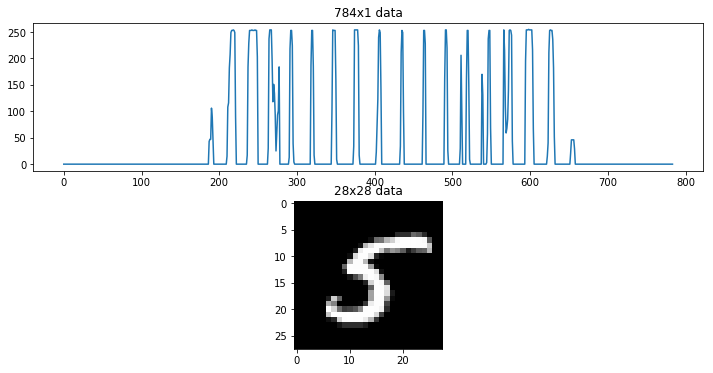

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

(37800, 784)
(37800, 28, 28, 1)
(28, 28, 1)


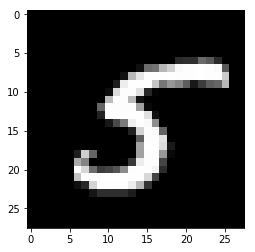

In [6]:
print(x_train.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_train[0].shape)
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [7]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [8]:
print(y_train[0])
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [9]:
def build_model():
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'Same',
                     input_shape = (28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(0.4))
    # Block 2
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(0.4))
    # Block 3
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(0.4))
    # # Block 4
    model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(strides=(2,2)))
    model.add(Dropout(0.4))
    # Block 5
    # model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    # model.add(BatchNormalization())
    # model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation='relu', padding = 'Same'))
    # model.add(BatchNormalization())
    # model.add(MaxPooling2D(strides=(2,2)))
    # model.add(Dropout(0.25))
    # Output
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

In [10]:
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [11]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [12]:
annealer = LearningRateScheduler(lambda x: 1e-4 * 0.9 ** x)

# log_dir = os.path.join(model_path, run_name)
# print('log_dir:' + log_dir)
# tensorBoard = TensorBoard(log_dir=log_dir)

In [13]:
%%time
batch_size = 128
steps_per_epoch = x_train.shape[0] / batch_size
hist = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size, seed=2017),
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    verbose=1,  #1 for ETA, 0 for silent
    validation_data=(x_val[:400,:], y_val[:400,:]),
    callbacks=[annealer]
)

Epoch 1/30
296/295 [==============================] - 34s 114ms/step - loss: 1.9212 - acc: 0.2977 - val_loss: 13.6541 - val_acc: 0.1150
Epoch 2/30
296/295 [==============================] - ETA: 0s - loss: 0.6210 - acc: 0.786 - 31s 106ms/step - loss: 0.6203 - acc: 0.7868 - val_loss: 4.3978 - val_acc: 0.3650
Epoch 3/30
296/295 [==============================] - 31s 106ms/step - loss: 0.2745 - acc: 0.9164 - val_loss: 0.2420 - val_acc: 0.9550
Epoch 4/30
296/295 [==============================] - 31s 106ms/step - loss: 0.1883 - acc: 0.9432 - val_loss: 0.1957 - val_acc: 0.9550
Epoch 5/30
296/295 [==============================] - 32s 109ms/step - loss: 0.1502 - acc: 0.9543 - val_loss: 0.0824 - val_acc: 0.9800
Epoch 6/30
296/295 [==============================] - 31s 106ms/step - loss: 0.1288 - acc: 0.9619 - val_loss: 0.1034 - val_acc: 0.9800
Epoch 7/30
296/295 [==============================] - 31s 106ms/step - loss: 0.1134 - acc: 0.9663 - val_loss: 0.1006 - val_acc: 0.9750
Epoch 8/30
296/2

In [14]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0369, final accuracy: 0.9917


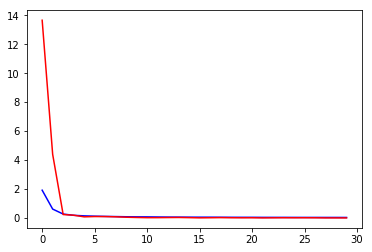

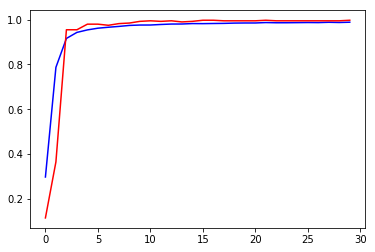

In [15]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [16]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[413   0   0   0   0   0   1   0   0   0]
 [  0 479   0   0   0   0   0   1   0   0]
 [  1   0 414   0   0   0   0   2   0   0]
 [  1   0   0 437   0   0   0   3   0   1]
 [  0   0   0   0 379   0   0   0   0   1]
 [  0   0   0   1   0 370   5   1   0   2]
 [  0   0   0   0   0   0 433   0   0   0]
 [  0   3   0   0   1   0   0 426   0   0]
 [  0   2   1   2   1   0   0   0 398   1]
 [  0   0   0   0   2   0   0   2   0 416]]


In [17]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

### Pseudo Labeling

In [18]:
ps_y_test = model.predict(x_test, batch_size=64)
print(ps_y_test.shape)

(28000, 10)


In [19]:
print(x_train.shape)
print(x_val.shape)

print(y_train.shape)
print(y_val.shape)

print(x_test.shape)
print(ps_y_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)
(28000, 28, 28, 1)
(28000, 10)


In [20]:
ps_x_data = np.concatenate([x_train, x_val, x_test], axis=0)
ps_y_data = np.concatenate([y_train, y_val, ps_y_test], axis=0)
print(ps_x_data.shape)
print(ps_y_data.shape)

(70000, 28, 28, 1)
(70000, 10)


In [21]:
x_train, x_val, y_train, y_val = train_test_split(ps_x_data, ps_y_data, test_size=0.02)
print(x_train.shape)
print(x_val.shape)

print(y_train.shape)
print(y_val.shape)

(68600, 28, 28, 1)
(1400, 28, 28, 1)
(68600, 10)
(1400, 10)


In [22]:
%%time
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

batch_size = 128
steps_per_epoch = x_train.shape[0] / batch_size
hist = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size, seed=2017),
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    verbose=1,  #1 for ETA, 0 for silent
    validation_data=(x_val[:400,:], y_val[:400,:]),
    callbacks=[annealer]
)

Epoch 1/50
536/535 [==============================] - 57s 106ms/step - loss: 1.4537 - acc: 0.4710 - val_loss: 11.8040 - val_acc: 0.1275
Epoch 2/50
536/535 [==============================] - 56s 105ms/step - loss: 0.2588 - acc: 0.9209 - val_loss: 0.2363 - val_acc: 0.9525
Epoch 3/50
536/535 [==============================] - 56s 104ms/step - loss: 0.1485 - acc: 0.9564 - val_loss: 0.1117 - val_acc: 0.9725
Epoch 4/50
536/535 [==============================] - 56s 104ms/step - loss: 0.1076 - acc: 0.9682 - val_loss: 0.0769 - val_acc: 0.9750
Epoch 5/50
536/535 [==============================] - 56s 105ms/step - loss: 0.0899 - acc: 0.9742 - val_loss: 0.0840 - val_acc: 0.9825
Epoch 6/50
536/535 [==============================] - 57s 107ms/step - loss: 0.0790 - acc: 0.9771 - val_loss: 0.0855 - val_acc: 0.9850
Epoch 7/50
536/535 [==============================] - 57s 106ms/step - loss: 0.0692 - acc: 0.9807 - val_loss: 0.0556 - val_acc: 0.9850
Epoch 8/50
536/535 [==============================] - 

Final loss: 0.0311, final accuracy: 0.9943


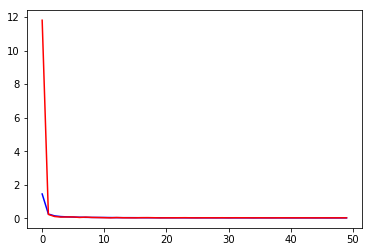

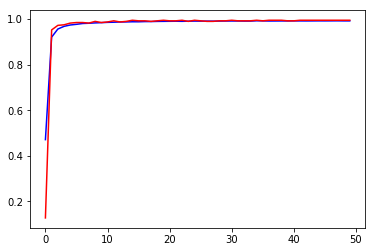

In [23]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [24]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[148   0   0   0   0   0   0   0   0   0]
 [  0 146   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 128   0   0   0   0   1   1]
 [  0   0   0   0 135   0   0   0   0   2]
 [  0   0   0   0   0 124   0   0   0   0]
 [  0   0   0   0   1   0 132   0   0   0]
 [  0   0   0   0   0   0   0 167   1   0]
 [  0   0   0   0   0   0   1   0 140   0]
 [  0   0   0   0   0   0   0   0   1 131]]


## Predict

In [25]:
import time
import os

project_name = 'Digit_Recognizer'
step_name = 'CNN_Pseudo'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
final_acc_str = str(int(final_acc*10000))
run_name = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name)
cwd = os.getcwd()
output_file = os.path.join(cwd, 'output', run_name + '.csv')
print(output_file)

Digit_Recognizer_CNN_Pseudo_20180111_120631_9942
D:\ref\Kaggle\digit-recognizer\output\Digit_Recognizer_CNN_Pseudo_20180111_120631_9942.csv


In [26]:
y_hat = model.predict(x_test, batch_size=64)

In [27]:
y_pred = np.argmax(y_hat,axis=1)

In [28]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [29]:
print('Done!')

Done!
